In [1]:
from typing import Dict, TypedDict, List
import random
from langgraph.graph import StateGraph, START, END

In [15]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [17]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting node that greets the user by name."""
    state["name"] = f"Hi there, {state['name']}"
    state["counter"] = 0 #Setting the counter to 0. This wipes out invalid values

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0, 10)) #Append the randomly generated number to the list
    state["counter"] += 1 #Increment the counter by 1

    return state

def should_continue(state: AgentState) -> AgentState:
    """Function to decide what do next"""
    if state["counter"] < 5:
        print("Entering Loop", state["counter"])
        return "loop" #loop edge
    else:
        print("Exiting Loop", state["counter"])
        return "exit" #exit edge


In [18]:
#greeting_node -> random_node -> random_node -> random_node -> random_node -> random_node -> END

In [23]:
#Create Graph
graph = StateGraph(AgentState) #Initialize the graph with the state schema

graph.add_node("greeting", greeting_node) #Add greeting node
graph.add_node("random", random_node) # Add random number node
graph.add_edge("greeting","random") #Add edge from greeting to random node

graph.add_conditional_edges( 
    "random", #From random node
    should_continue, #routing function
    {
        "loop": "random", #If should_continue returns "loop", go back to random node
        "exit": END #If should_continue returns "exit", go to END
    }
)

graph.set_entry_point("greeting") #Set entry point to greeting node

app = graph.compile() #Compile the graph into an application

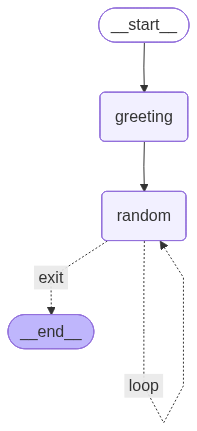

In [24]:
#Visualize the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
app.invoke({"name":"Prasad", "number":[], "counter":0})

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4
Exiting Loop 5


{'name': 'Hi there, Prasad', 'number': [3, 4, 10, 1, 9], 'counter': 5}